In [1]:
from nltk.corpus import stopwords
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import numpy as np  # linear algebra
import pandas as pd

# for plotting images & adjusting colors
import matplotlib.pyplot as plt


In [2]:
# import tweets data
tweets = pd.read_csv("data/cleaned_labelled_tweets.csv")
print(tweets.head())


                                                Text  Sentiment
0  kickers on my watchlist stock tit stock stock ...          1
1  user stock movie number return for the stock s...          1
2  user i d be afraid to short stock they are loo...          1
3                          stock over number number           1
4                          stock over number number           1


In [3]:
# cleaning the dataset

import re


def remove_links(Text):
    Text = re.sub('http[^\s]+', '', Text)
    digitspattern = r'[0-9]'
    # replace all digits in the string with empty string
    Text = re.sub(digitspattern, '', Text)
    return Text


tweets['Text'] = tweets['Text'].apply(remove_links)

print(tweets.head())


                                                Text  Sentiment
0  kickers on my watchlist stock tit stock stock ...          1
1  user stock movie number return for the stock s...          1
2  user i d be afraid to short stock they are loo...          1
3                          stock over number number           1
4                          stock over number number           1


In [4]:
# important libraries for preprocessing using NLTK
import nltk

# for importing data and wrangling
import pandas as pd
import numpy as np

# for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
# most frequent words

from nltk.corpus import stopwords
# nltk.download('stopwords')
stop = set(stopwords.words("english"))

corpus = [word for i in tweets["Text"].str.split().values.tolist()
          for word in i if (word not in stop)]
# print(corpus)


In [5]:
# dataset we train word2vec on
data = pd.read_csv("/Users/poojagrewal/Downloads/cleaned_financial_tweets.csv")
print(data.head())


                    id                                               text  \
0  1019696670777503700  video i was in my office i was minding my own ...   
1  1019709091038548000  the price of lumber lb f is down @number since...   
2  1019711413798035500           who says the american dream is dead http   
3  1019718460287389700  how satellites avoid attacks and space junk wh...   
4  1019720723441635300  senate wants emergency alerts to go out throug...   

                        timestamp        source symbols      company_names  \
0  Wed Jul 18 21:33:26 +0000 2018  GoldmanSachs      GS  The Goldman Sachs   
1  Wed Jul 18 22:22:47 +0000 2018    StockTwits       M             Macy's   
2  Wed Jul 18 22:32:01 +0000 2018     TheStreet     AIG           American   
3  Wed Jul 18 23:00:01 +0000 2018        Forbes    ORCL             Oracle   
4  Wed Jul 18 23:09:00 +0000 2018    TechCrunch    NFLX            Netflix   

                                                 url  verified  
0  

In [6]:
import pandas as pd
from gensim.models import Word2Vec, KeyedVectors
data = [row.split(' ') for row in data['text']]
model = Word2Vec(data, min_count=3, vector_size=100,
                 workers=3, window=5, sg=1, epochs=100)
word_vectors = model.wv
word_vectors.save('vectors_2.kv')
reloaded_word_vectors = KeyedVectors.load('vectors_2.kv')
print(reloaded_word_vectors)

w1 = "support"
model.wv.most_similar(positive=w1)


KeyedVectors<vector_size=100, 6062 keys>


[('level', 0.5645415782928467),
 ('ris', 0.5292462706565857),
 ('trendline', 0.5157818794250488),
 ('area', 0.5135337710380554),
 ('@numberish', 0.5056371688842773),
 ('weve', 0.49981266260147095),
 ('bounces', 0.497825026512146),
 ('till', 0.49684518575668335),
 ('stipend', 0.49448660016059875),
 ('ibdpartner', 0.48978257179260254)]

In [7]:
train_data = pd.read_csv("/Users/poojagrewal/Downloads/train_data.csv")
test_data = pd.read_csv("/Users/poojagrewal/Downloads/test_data.csv")

print(train_data.head())


                                                text  label
0              @stock breakout watch @number @number      1
1  @user i hate to be under @number as average i ...     -1
2  nice share @user @stock intraday short explain...     -1
3  @stock still looking interesting trading withi...      1
4          the ticker has actually stopped on @stock      1


In [8]:
from datasets import load_dataset, Dataset

train_data['label'] = train_data['label'].replace(-1, 0)
test_data['label'] = test_data['label'].replace(-1, 0)
train_df = Dataset.from_pandas(train_data)
test_df = Dataset.from_pandas(test_data)
trainval_df = train_df.train_test_split(test_size=0.2)
trainval_df, test_df
x_train = trainval_df['train']["text"]
x_val = trainval_df['test']['text']
x_test = test_df["text"]
y_train = trainval_df['train']["label"]
y_val = trainval_df['test']['text']
y_test = test_df["label"]


In [9]:
def make_feature_vec(words, model, num_features):
    """
    Average the word vectors for a set of words
    """
    feature_vec = np.zeros(
        (num_features,), dtype="float32")  # pre-initialize (for speed)
    nwords = 0.
    index2word_set = set(model.wv.index_to_key)  # words known to the model

    for word in words:
        if word in index2word_set:
            nwords = nwords + 1.
            feature_vec = np.add(feature_vec, model.wv[word])

    feature_vec = np.divide(feature_vec, nwords)
    return feature_vec


def get_avg_feature_vecs(reviews, model, num_features):
    """
    Calculate average feature vectors for all reviews
    """
    counter = 0
    # pre-initialize (for speed)
    review_feature_vecs = np.zeros(
        (len(reviews), num_features), dtype='float32')

    for review in reviews:
        review_feature_vecs[counter] = make_feature_vec(
            review, model, num_features)
        counter = counter + 1
    return review_feature_vecs


In [10]:
# calculate average feature vectors for training and test sets
num_features = 100
clean_train_reviews = x_train
# for review in x_train:
#     clean_train_reviews.append(review_to_wordlist(review, remove_stopwords=True))
trainDataVecs = get_avg_feature_vecs(clean_train_reviews, model, num_features)


In [11]:
clean_test_reviews = x_test
# for review in x_test:
#     clean_test_reviews.append(review_to_wordlist(review, remove_stopwords=True))
testDataVecs = get_avg_feature_vecs(clean_test_reviews, model, num_features)


In [12]:
trainDataVecs2 = np.transpose(trainDataVecs)
trainDataVecs.shape


(3705, 100)

In [13]:
# Fit a random forest to the training data before hyperparameter tuning)
forest = RandomForestClassifier()

print("Fitting a random forest to labeled training data...")
forest = forest.fit(trainDataVecs, y_train)


Fitting a random forest to labeled training data...


In [14]:
# Now we'll do some hyperparameter tuning using GridSearchCV.
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))


In [15]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf, parameters)
cv.fit(trainDataVecs, y_train)
print_results(cv)


BEST PARAMS: {'max_depth': 20, 'n_estimators': 100}

0.629 (+/-0.002) for {'max_depth': 2, 'n_estimators': 5}
0.63 (+/-0.001) for {'max_depth': 2, 'n_estimators': 50}
0.63 (+/-0.001) for {'max_depth': 2, 'n_estimators': 100}
0.627 (+/-0.047) for {'max_depth': 10, 'n_estimators': 5}
0.667 (+/-0.01) for {'max_depth': 10, 'n_estimators': 50}
0.666 (+/-0.017) for {'max_depth': 10, 'n_estimators': 100}
0.613 (+/-0.026) for {'max_depth': 20, 'n_estimators': 5}
0.662 (+/-0.019) for {'max_depth': 20, 'n_estimators': 50}
0.671 (+/-0.034) for {'max_depth': 20, 'n_estimators': 100}
0.61 (+/-0.024) for {'max_depth': None, 'n_estimators': 5}
0.653 (+/-0.047) for {'max_depth': None, 'n_estimators': 50}
0.665 (+/-0.021) for {'max_depth': None, 'n_estimators': 100}


In [16]:
# using the best parameter, we train a new random forest rf2

rf2 = RandomForestClassifier(n_estimators=100, max_depth=20)
rf2.fit(trainDataVecs, y_train)


RandomForestClassifier(max_depth=20)

In [17]:
# remove instances in test set that could not be represented as feature vectors
nan_indices = list({x for x, y in np.argwhere(np.isnan(testDataVecs))})
if len(nan_indices) > 0:
    print('Removing {:d} instances from test set.'.format(len(nan_indices)))
    testDataVecs = np.delete(testDataVecs, nan_indices, axis=0)
    x_test.drop(x_test.iloc[nan_indices, :].index, axis=0, inplace=True)
    assert testDataVecs.shape[0] == len(x_test)


In [18]:
print("Predicting labels for test data..")
result = forest.predict(testDataVecs)


Predicting labels for test data..


In [19]:
print("Predicting labels for test data..")
predictions = rf2.predict(testDataVecs)


Predicting labels for test data..


In [20]:
print(classification_report(y_test, result))
accuracy = round(accuracy_score(y_test, result), 3)
print(accuracy)


              precision    recall  f1-score   support

           0       0.61      0.31      0.41       396
           1       0.71      0.90      0.79       763

    accuracy                           0.70      1159
   macro avg       0.66      0.60      0.60      1159
weighted avg       0.68      0.70      0.66      1159

0.695


In [21]:
print(classification_report(y_test, predictions))
accuracy1 = round(accuracy_score(y_test, predictions), 3)
print(accuracy1)


              precision    recall  f1-score   support

           0       0.64      0.32      0.42       396
           1       0.72      0.91      0.80       763

    accuracy                           0.70      1159
   macro avg       0.68      0.61      0.61      1159
weighted avg       0.69      0.70      0.67      1159

0.705


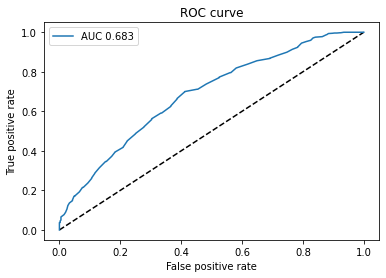

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
probs = forest.predict_proba(testDataVecs)[:, 1]

fpr, tpr, _ = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC {:.3f}'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [ ]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='.0f')
